In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


2024-09-04 09:37:54.039520: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 09:37:54.039575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 09:37:54.041432: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df="/kaggle/input/gender-classification-dataset/Training"

In [45]:
training_data=tf.keras.preprocessing.image_dataset_from_directory(
    df,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.5,
    subset='training',
    interpolation='bilinear',
)


Found 47009 files belonging to 2 classes.
Using 23505 files for training.


In [46]:
val_df="/kaggle/input/gender-classification-dataset/Validation"
validation_data=tf.keras.preprocessing.image_dataset_from_directory(
    df,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
)


Found 47009 files belonging to 2 classes.
Using 9401 files for validation.


In [5]:
import cv2

# # Female =0
# # Male   =1

32


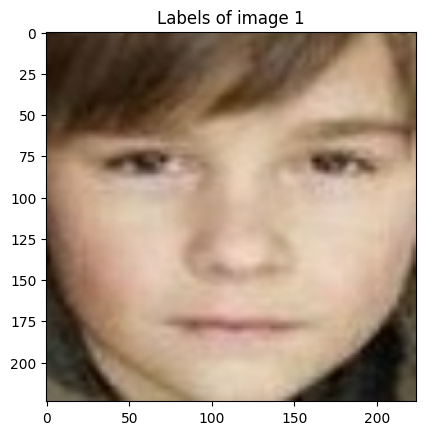

32


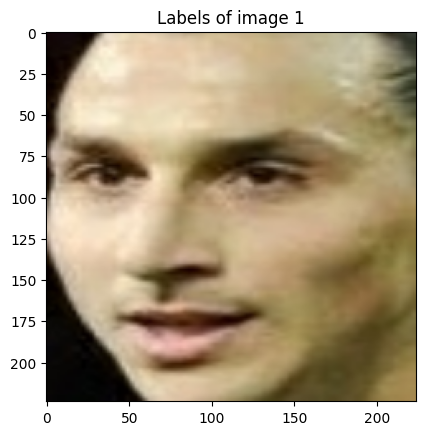

32


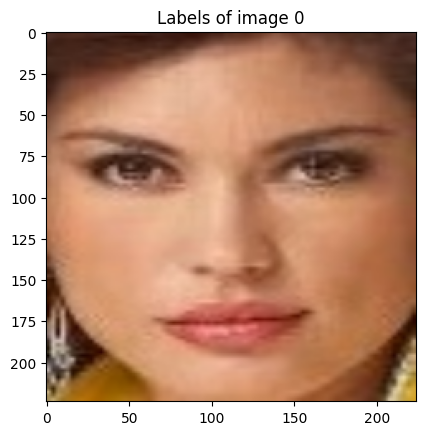

In [6]:
import matplotlib.pyplot as plt

for images, labels in training_data.take(3):
    image=images[0]
    label=labels[0]
    print(len(images))
    plt.title(f"Labels of image {label}")
    plt.imshow(image.numpy
               ().astype('uint8'))
    plt.show()
    

In [7]:
from sklearn.model_selection import train_test_split

# # Deep learning Model using Conv2D layers

In [8]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.models import Model
from keras.initializers import HeNormal
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [9]:
early_stopping=EarlyStopping(
monitor='val_loss',
patience=5,
verbose=1)

In [10]:
# inputs=Input(shape=(224, 224, 3))
# conv=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
# conv=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(conv)
# maxp=MaxPooling2D(2,2)(conv)
# drop=Dropout(0.5)(maxp)             
# conv=Conv2D(64,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(drop)
# conv=Conv2D(64,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(conv)
# maxp=MaxPooling2D(2,2)(conv)
# flat=Flatten()(maxp)
# # dense=Dense(256,activation="relu")(flat)
# # dense=Dense(128,activation="relu")(dense)
# # drop=Dropout(0.5)(dense)
# dense=Dense(32,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(flat)
# ouputs=Dense(1,activation="sigmoid")(dense)
# model=Model(inputs,ouputs)


In [11]:
# model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
# for images,labels in training_data.take(1):
# model.fit(training_data,epochs=100,validation_data=validation_data,callbacks=[early_stopping])

In [13]:
# y_pred=model.predict(validation_data)

In [15]:
# image_photo=cv2.imread("/kaggle/input/image-123/1354.jpg")
# image_photo=cv2.resize(image_photo,(224, 224))
# dr=model.predict(image_photo)

In [16]:
# dr=model.predict(image_photo)

In [17]:
# if dr==1:
#     print("This image is Male")
# else:
#     print("this image is Female")

In [18]:
from tensorflow.keras.applications import VGG16


In [19]:

# Function to expand dimensions
def expand_dim(image, label):
    # Expand dimensions for your specific requirement
    # Example: Adding a channel dimension if needed
    label = tf.expand_dims(label, axis=-1)  # Add a new axis for channels if necessary
    return image, label

# Apply the function to the dataset
training_dataset = training_data.map(expand_dim)
validation_dataset2 = validation_data.map(expand_dim)

In [20]:
for image, label in training_dataset.take(1):
    print(label.shape) # This will print the shape of a batch of images


(32, 1)


In [36]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# for layer in base_model.layers:
#     layer.trainable = False
# model_output=base_model.output

# base_model.trainable = False


# # x = base_model(inputs, training=False)

# # Add custom layers
# x = Conv2D(32, (3, 3), activation='relu',padding='same')(model_output)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu',padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Flatten()(x)
# x = Dense(128, activation='relu')(x)
# outputs2 = Dense(1, activation='sigmoid')(x)  # Binary classification

# # Create model
# model3 = Model(inputs=base_model.input, outputs=outputs2)

# # # Add custom layers for gender classification
# # x = Flatten()(base_model.output)
# # x = Dense(32, activation='relu')(x)
# # x = Dense(32, activation='relu')(x)
# # x = Dense(32, activation='relu')(x)

# # x = Dense(2, activation='softmax')(x)  # Binary classification

# # # Create the final model
# # model = Model(inputs=base_model.input, outputs=x)
# model3.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [40]:
# Input layer
base_model.trainable = False
inputs = Input(shape=(128, 128, 3))

# Base model
x = base_model(inputs, training=False)

# Add custom layers on top of VGG16
x = Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu',padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)  # Binary classification for gender

# Create the model
model = Model(inputs, outputs)
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [41]:
model3.fit(training_data,epochs=100,validation_data=validation_data,callbacks=[early_stopping])

Epoch 1/100


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m134266741318096\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)\n  • training=True\n  • mask=None'

In [42]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Load the VGG16 model pre-trained on ImageNet, excluding the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Input layer
inputs = Input(shape=(128, 128, 3))

# Base model
x = base_model(inputs, training=False)

# Add custom layers on top of VGG16
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
model.fit(training_data, epochs=100, validation_data=validation_data, callbacks=[early_stopping])


Epoch 1/100


ValueError: Exception encountered when calling MaxPooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node functional_6_1/max_pooling2d_31_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](functional_6_1/conv2d_34_1/Relu)' with input shapes: [?,1,1,128].[0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

In [44]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Load the VGG16 model pre-trained on ImageNet, excluding the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Input layer
inputs = Input(shape=(128, 128, 3))

# Base model
x = base_model(inputs, training=False)

# Print the shape of the tensor after the base model
print(f"Shape after base model: {x.shape}")

# Add custom layers on top of VGG16
x = Conv2D(32, (1, 1), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
print(f"Shape after first Conv2D and MaxPooling2D: {x.shape}")

x = Conv2D(64, (1, 1), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
print(f"Shape after second Conv2D and MaxPooling2D: {x.shape}")

x = Conv2D(128, (1, 1), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
print(f"Shape after third Conv2D and MaxPooling2D: {x.shape}")

x = Flatten()(x)
print(f"Shape after Flatten: {x.shape}")

x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
model.fit(training_data, epochs=100, validation_data=validation_data, callbacks=[early_stopping])


Shape after base model: (None, 4, 4, 512)
Shape after first Conv2D and MaxPooling2D: (None, 2, 2, 32)
Shape after second Conv2D and MaxPooling2D: (None, 1, 1, 64)
Shape after third Conv2D and MaxPooling2D: (None, 0, 0, 128)
Shape after Flatten: (None, 0)
Epoch 1/100


ValueError: Exception encountered when calling MaxPooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node functional_8_1/max_pooling2d_37_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](functional_8_1/conv2d_40_1/Relu)' with input shapes: [?,1,1,128].[0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

In [49]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Load the VGG16 model pre-trained on ImageNet, excluding the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model
base_model.trainable = False

# Input layer
inputs = Input(shape=(256, 256, 3))

# Base model
x = base_model(inputs, training=False)

# Add custom layers on top of VGG16
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(training_data, epochs=100, validation_data=validation_data, callbacks=[early_stopping])

# Print model summary
# model.summary()


Epoch 1/100
735/735 ━━━━━━━━━━━━━━━━━━━━ 225s 302ms/step - accuracy: 0.8631 - loss: 0.3852 - val_accuracy: 0.9461 - val_loss: 0.1430
Epoch 2/100
735/735 ━━━━━━━━━━━━━━━━━━━━ 158s 215ms/step - accuracy: 0.9552 - loss: 0.1230 - val_accuracy: 0.9393 - val_loss: 0.1785
Epoch 3/100
735/735 ━━━━━━━━━━━━━━━━━━━━ 158s 216ms/step - accuracy: 0.9679 - loss: 0.0952 - val_accuracy: 0.9448 - val_loss: 0.1612
Epoch 4/100
735/735 ━━━━━━━━━━━━━━━━━━━━ 158s 215ms/step - accuracy: 0.9773 - loss: 0.0674 - val_accuracy: 0.9413 - val_loss: 0.2122
Epoch 5/100
735/735 ━━━━━━━━━━━━━━━━━━━━ 158s 215ms/step - accuracy: 0.9815 - loss: 0.0556 - val_accuracy: 0.9468 - val_loss: 0.2247
Epoch 6/100
735/735 ━━━━━━━━━━━━━━━━━━━━ 158s 216ms/step - accuracy: 0.9870 - loss: 0.0377 - val_accuracy: 0.9465 - val_loss: 0.2285
Epoch 6: early stopping


In [66]:
import cv2
import numpy as np
image_photo=cv2.imread("/kaggle/input/hassan/WhatsApp Image 2024-09-04 at 1.51.47 PM.jpeg")
image_photo2=cv2.resize(image_photo,(256, 256))
img_array = np.expand_dims(image_photo2, axis=0)  # Add batch dimension

img_array.shape

(1, 256, 256, 3)

In [67]:
dr=model.predict(img_array)
dr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.99999833]], dtype=float32)

In [69]:
loss,accuracy=model.evaluate(validation_data)

294/294 ━━━━━━━━━━━━━━━━━━━━ 46s 156ms/step - accuracy: 0.9475 - loss: 0.2392


In [68]:
if dr>=0:
    print("This image is Male")
else:
    print("this image is Female")

This image is Male


In [85]:
from sklearn.metrics import precision_score, f1_score
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

for image,label in validation_data.take(3):
    dr2=model.predict(image)


# Convert probabilities to binary predictions
    binary_predictions = np.where(dr2 > 0.5, 1, 0)

# Cothreshold = 0.45
    y_pred_custom = (binary_predictions >= 0.50).astype(int)  # Convert probabilities to binary labels

# Calculate metrics
    precision = precision_score(label, y_pred_custom, average='weighted')
    recall = recall_score(label, y_pred_custom, average='weighted')
    f1 = f1_score(label, y_pred_custom, average='weighted')

print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1 Score: {f1}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Weighted Precision: 0.9703125
Weighted Recall: 0.96875
Weighted F1 Score: 0.968525641025641


In [60]:
# model.save("trained_gender_classification.h5")

In [62]:
from keras.models import load_model

In [64]:
loaded_model=load_model("/kaggle/working/trained_gender_classification.h5")

In [65]:
loaded_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


array([[0.99404764]], dtype=float32)